In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [16]:
df = pd.read_excel('Analisis_procesos_PV.xlsx',sheet_name='Base_datos')
df.columns

Index(['Codigo producto terminado', 'Descripcion producto terminado', 'Linea',
       'Modulo de linea', 'Codigo materia prima', 'Descripcion materia prima',
       'Muestra', 'UMI', 'Receta', 'Fecha muestra'],
      dtype='object')

In [17]:
df['PT y fecha'] = df['Descripcion producto terminado']+" - "+df['Fecha muestra'].dt.strftime('%d/%m/%Y')
df.columns

Index(['Codigo producto terminado', 'Descripcion producto terminado', 'Linea',
       'Modulo de linea', 'Codigo materia prima', 'Descripcion materia prima',
       'Muestra', 'UMI', 'Receta', 'Fecha muestra', 'PT y fecha'],
      dtype='object')

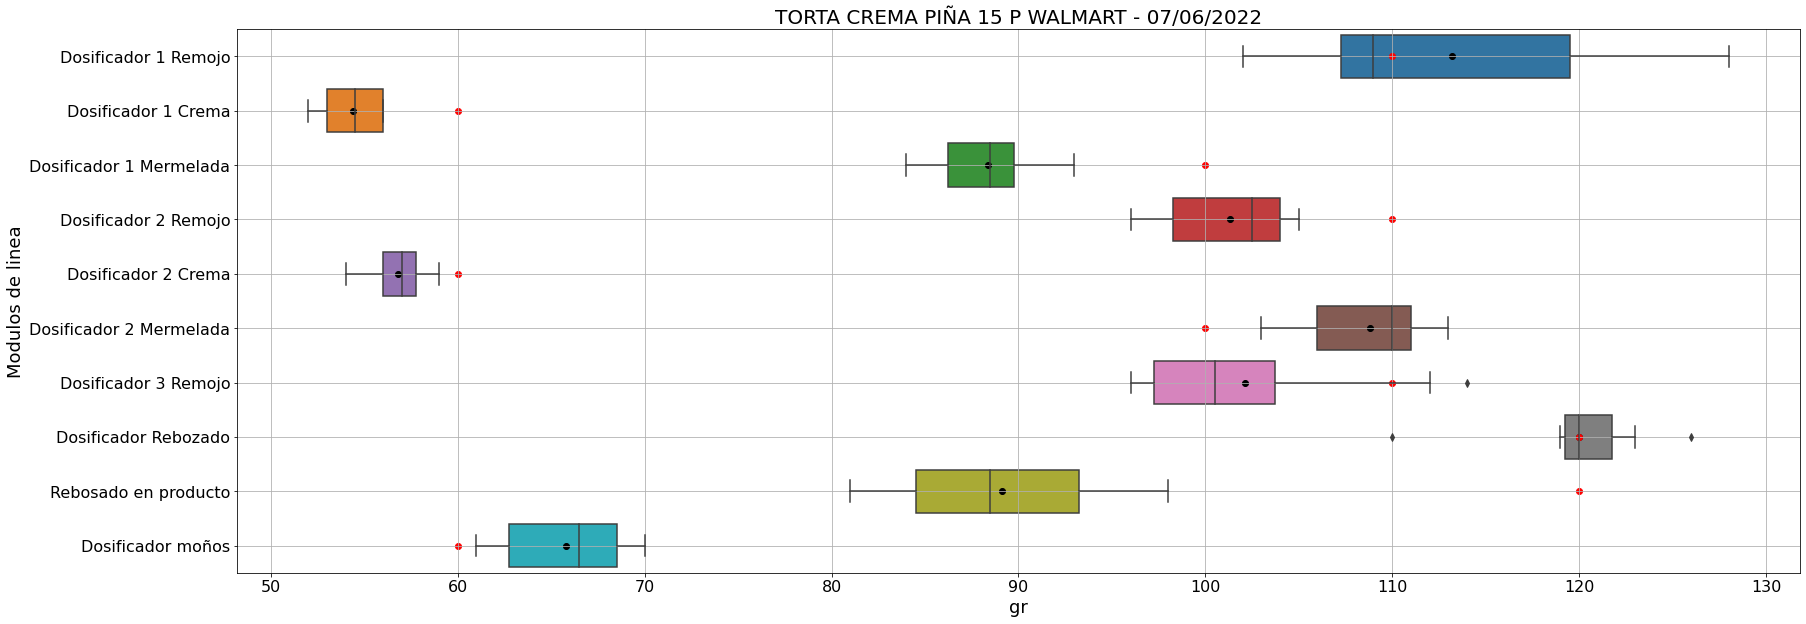

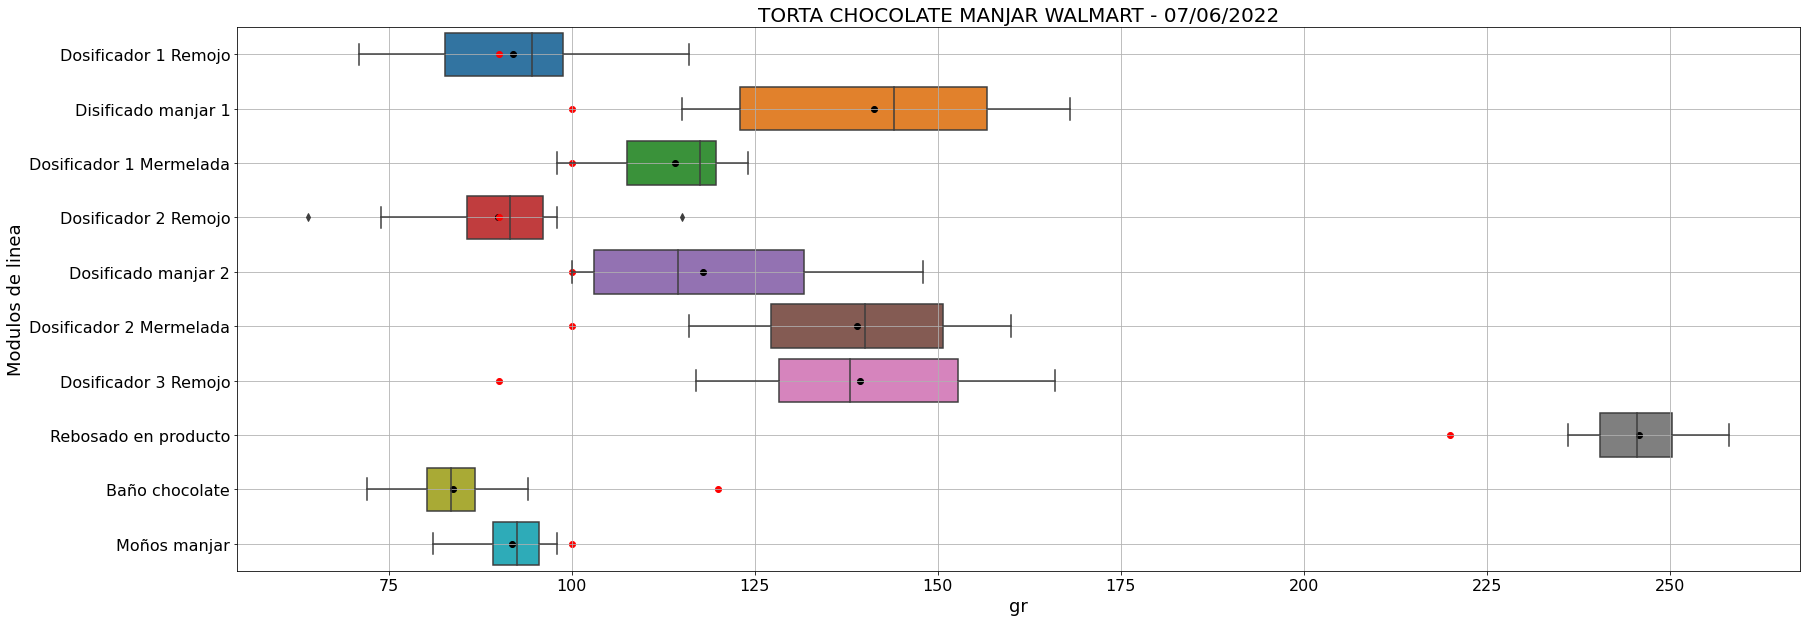

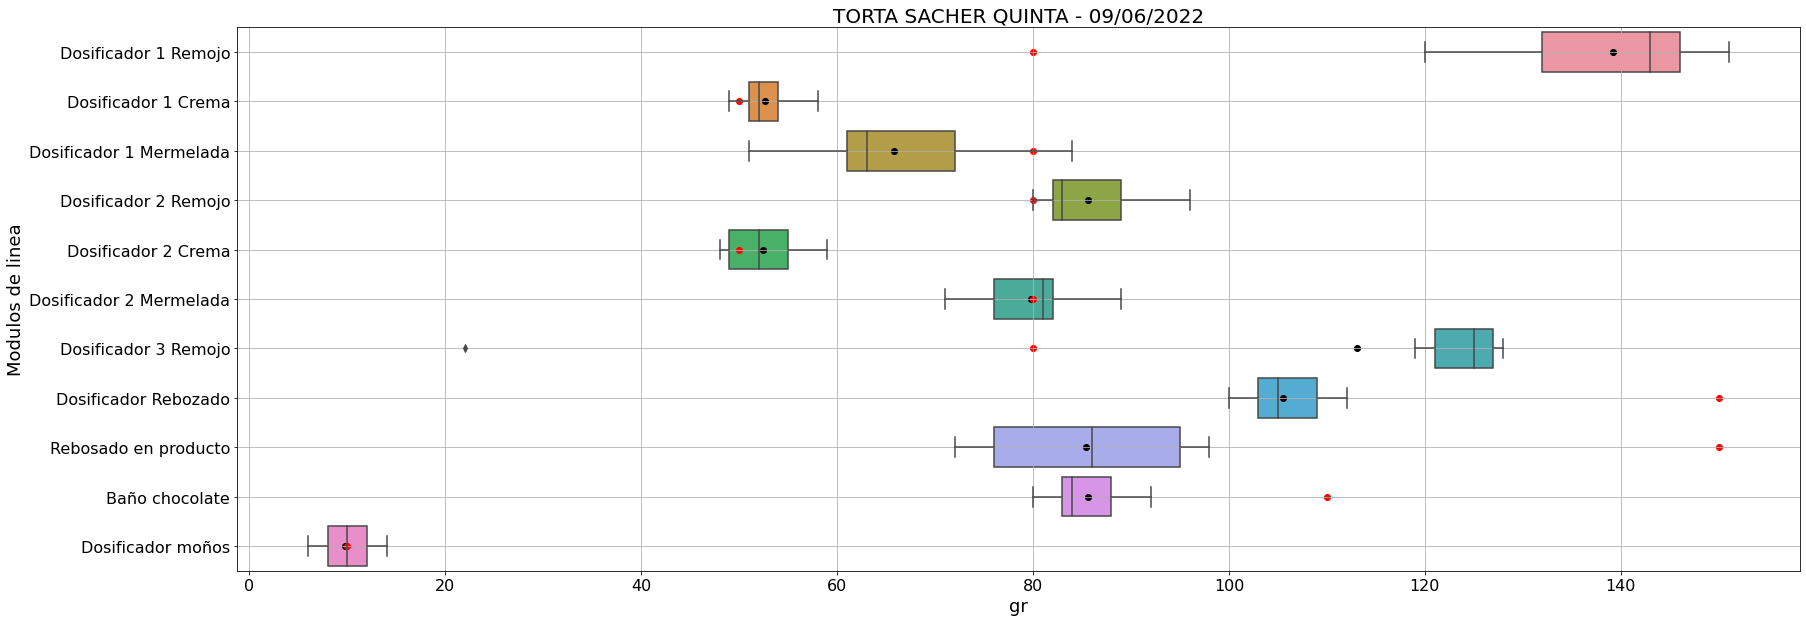

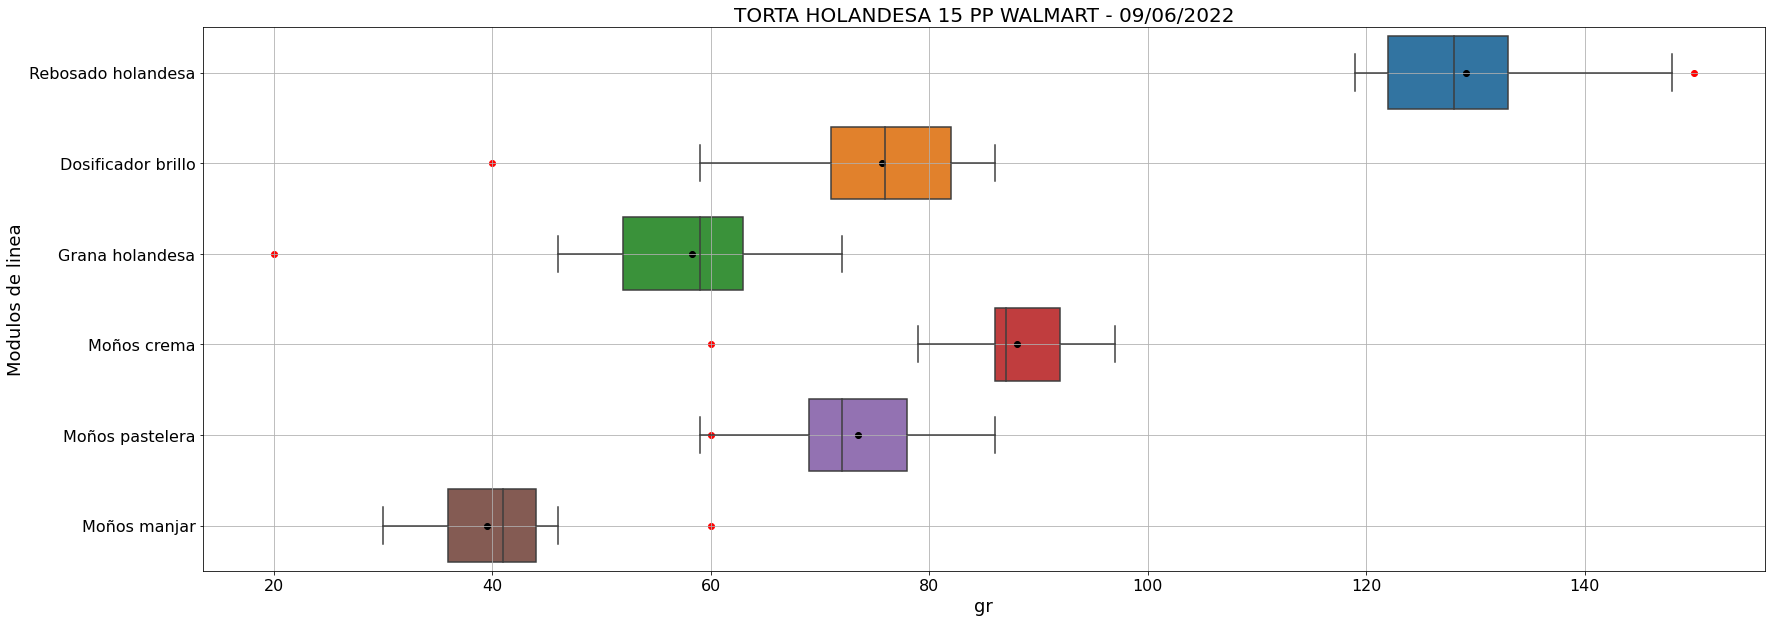

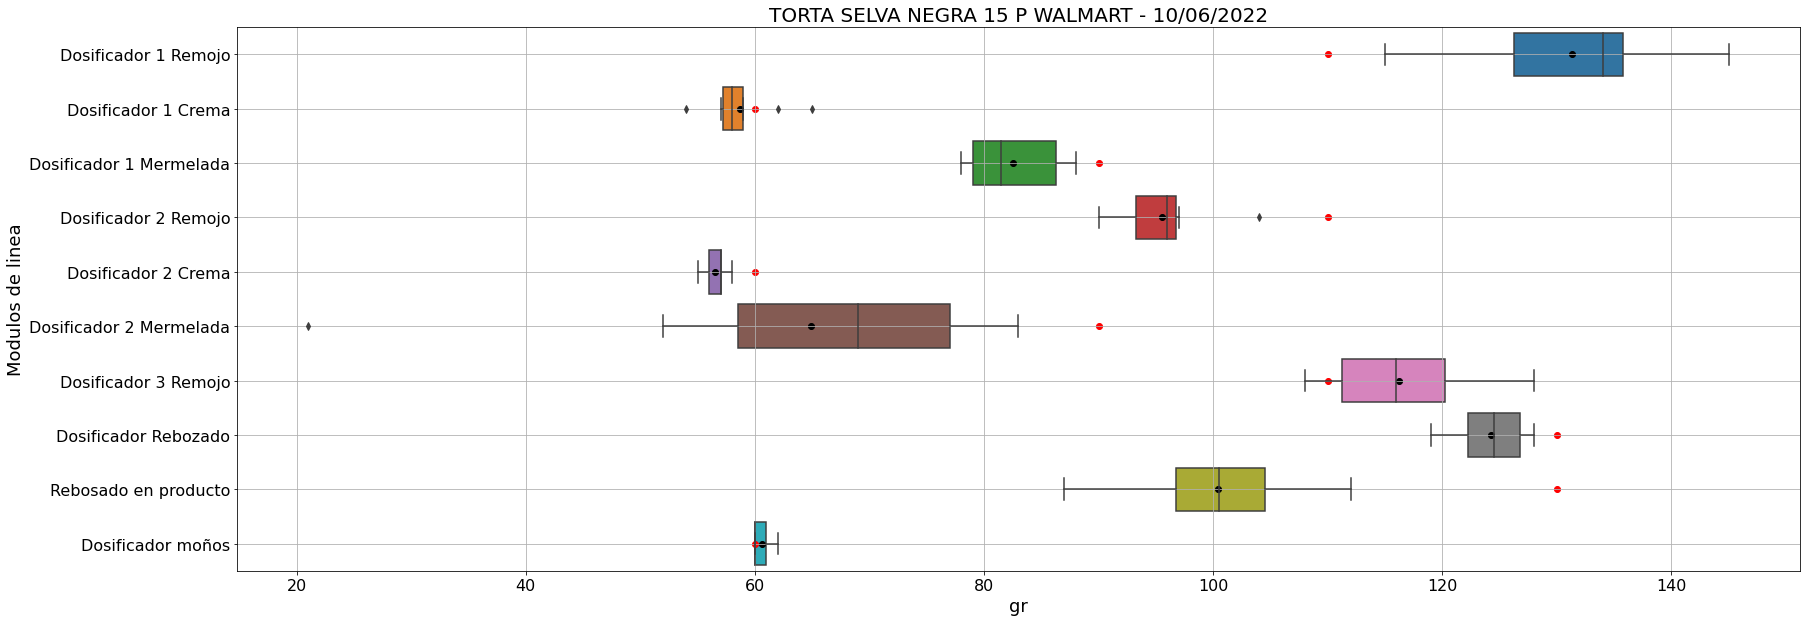

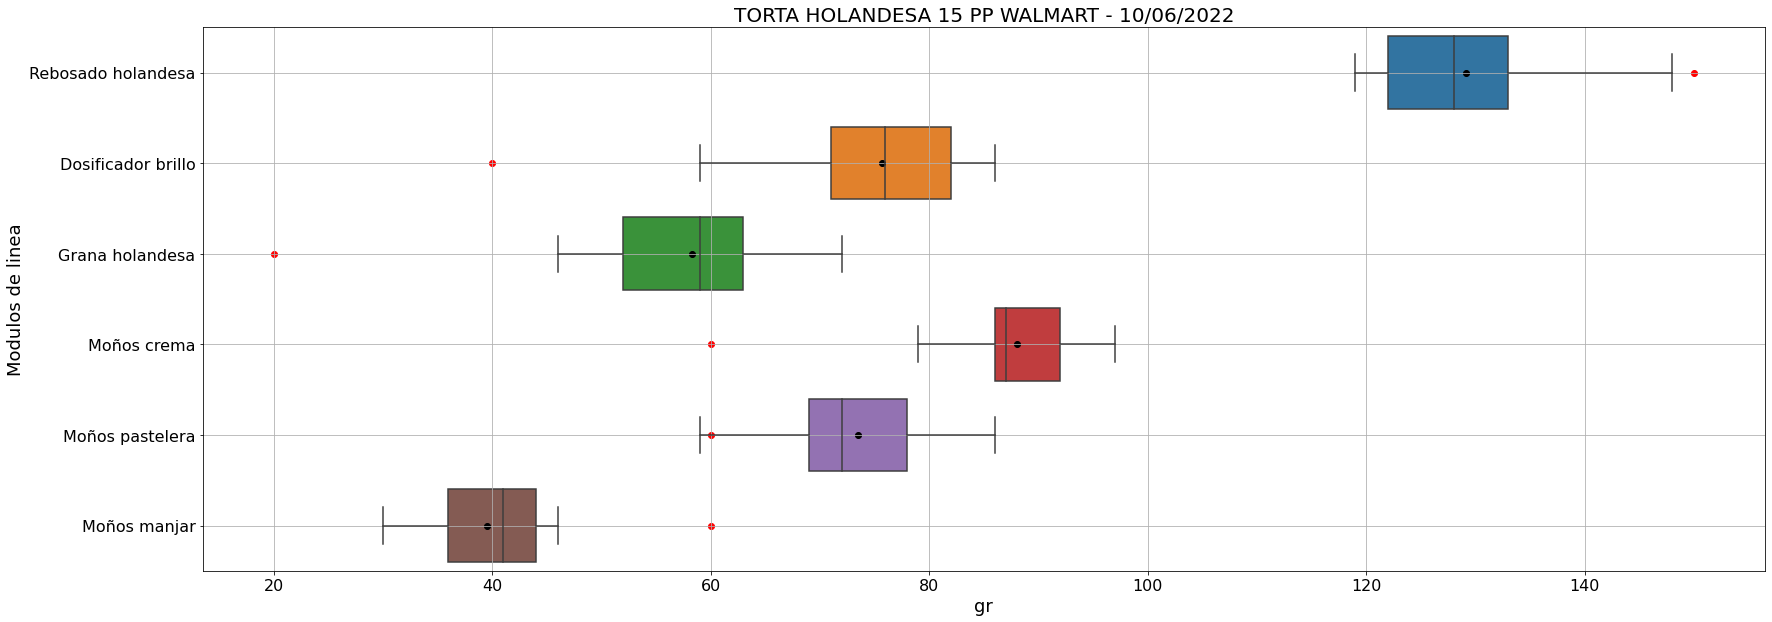

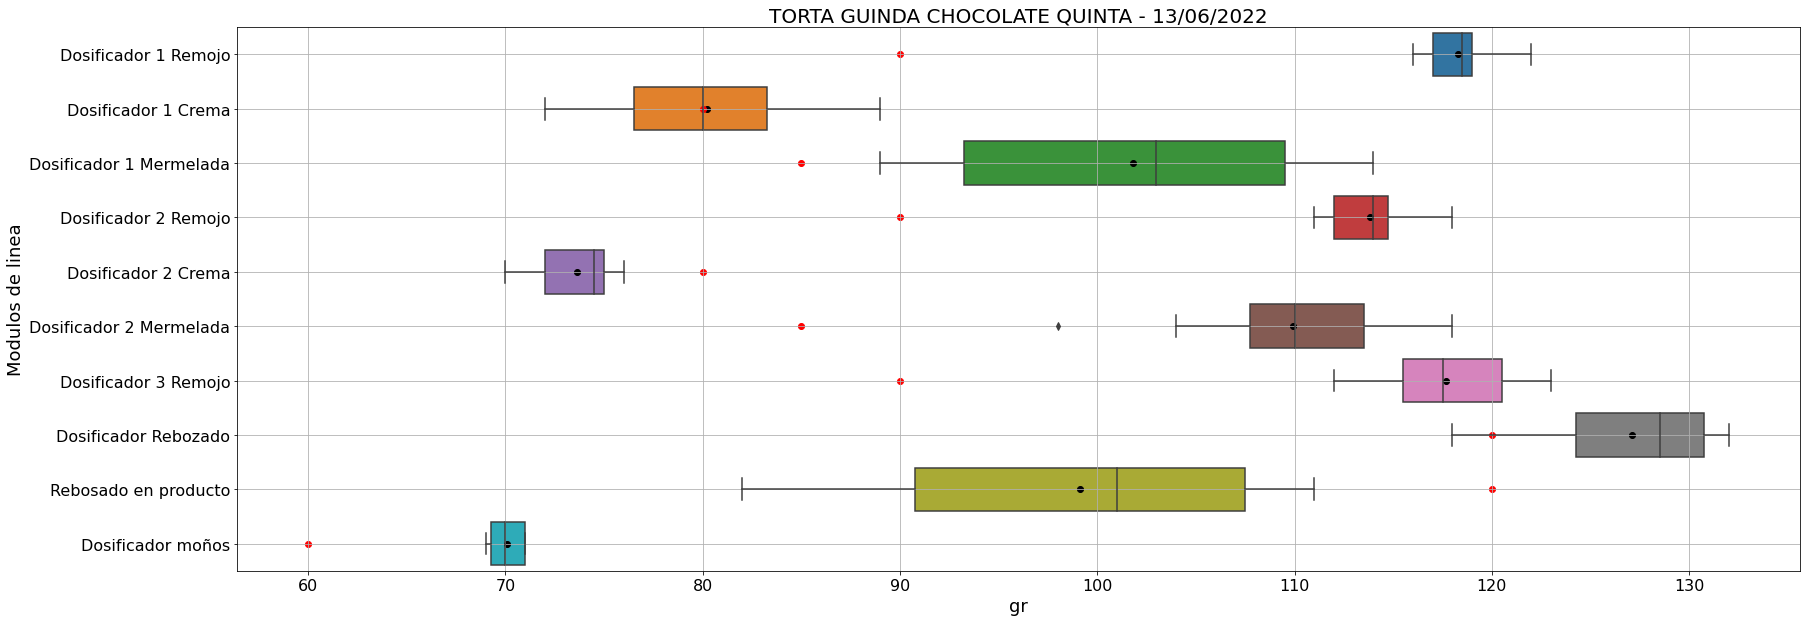

In [18]:
PT = df['PT y fecha'].drop_duplicates()
muestra = 1
for pt in PT:
    fig, ax = plt.subplots(figsize=(28,10))
    df2 = df[df['PT y fecha']==pt]
    sns.boxplot(data=df2,x='Muestra',y='Modulo de linea')
    ax.set_title(pt,size=20)
    ax.grid()
    ax.set_xlabel('gr',size=18)
    ax.set_ylabel('Modulos de linea',size=18)
    ax.tick_params(axis='x',labelsize=16)
    ax.tick_params(axis='y',labelsize=16)
    df3 = df2['Modulo de linea'].drop_duplicates()
    for ml in df3:
        df4 = df2[df2['Modulo de linea']==ml]
        ax.scatter(np.mean(df4['Muestra']),ml,c='k')
        ax.scatter(np.mean(df4['Receta']),ml,c='r')
    mus = 'Muestra'+str(muestra)
    muestra += 1
    plt.savefig(str(mus)+'.jpg',format='jpg')